### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sample_submission = pd.read_csv('datasets/tabular-playground-series-sep-2022/sample_submission.csv')
display(sample_submission.head())

,row_id,num_sold
0,70128,100
1,70129,100
2,70130,100
3,70131,100
4,70132,100


### Reading the Data

### Test Data

In [2]:
test_df = pd.read_csv('datasets/tabular-playground-series-sep-2022/test.csv', parse_dates=['date'])
display(test_df.head())

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques


### Train Data

In [3]:
train_df = pd.read_csv('datasets/tabular-playground-series-sep-2022/train.csv', parse_dates=['date'])
train_df = train_df.set_index('date').drop('row_id', axis=1)
display(train_df.head())
display(train_df.info())

,country,store,product,num_sold
date,,,,
2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70128 entries, 2017-01-01 to 2020-12-31
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   70128 non-null  object
 1   store     70128 non-null  object
 2   product   70128 non-null  object
 3   num_sold  70128 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


None

## EDA's

### Counting Values

In [4]:
display(train_df['product'].value_counts())

Kaggle Advanced Techniques          17532
Kaggle Getting Started              17532
Kaggle Recipe Book                  17532
Kaggle for Kids: One Smart Goose    17532
Name: product, dtype: int64

In [5]:
display(train_df['store'].value_counts())

KaggleMart    35064
KaggleRama    35064
Name: store, dtype: int64

In [6]:
display(train_df['country'].value_counts())

Belgium    11688
France     11688
Germany    11688
Italy      11688
Poland     11688
Spain      11688
Name: country, dtype: int64

### Looking For Null

In [7]:
train_df.isnull().sum()

country     0
store       0
product     0
num_sold    0
dtype: int64

### Groupby 
#### ```['country','store','product']``` then calculate mean



In [9]:
grouped = train_df.groupby(['country','store','product'])['num_sold'].mean()
grouped

country  store       product                         
Belgium  KaggleMart  Kaggle Advanced Techniques          405.895962
                     Kaggle Getting Started              325.649555
                     Kaggle Recipe Book                  243.922656
                     Kaggle for Kids: One Smart Goose    437.316222
         KaggleRama  Kaggle Advanced Techniques          140.880219
                     Kaggle Getting Started              113.041068
                     Kaggle Recipe Book                   84.738535
                     Kaggle for Kids: One Smart Goose    152.080767
France   KaggleMart  Kaggle Advanced Techniques          366.978097
                     Kaggle Getting Started              294.089665
                     Kaggle Recipe Book                  220.158795
                     Kaggle for Kids: One Smart Goose    395.650240
         KaggleRama  Kaggle Advanced Techniques          127.389459
                     Kaggle Getting Started              101.8

In [10]:
grouped = train_df.groupby(['country','store'])['num_sold'].mean()
grouped

country  store     
Belgium  KaggleMart    353.196099
         KaggleRama    122.685147
France   KaggleMart    319.219199
         KaggleRama    110.677960
Germany  KaggleMart    353.923169
         KaggleRama    122.876112
Italy    KaggleMart    279.781656
         KaggleRama     96.859685
Poland   KaggleMart    170.533368
         KaggleRama     59.026010
Spain    KaggleMart    254.567248
         KaggleRama     88.218172
Name: num_sold, dtype: float64

In [11]:
grouped = train_df.groupby(['country'])['num_sold'].mean()
grouped

country
Belgium    237.940623
France     214.948580
Germany    238.399641
Italy      188.320671
Poland     114.779689
Spain      171.392710
Name: num_sold, dtype: float64

### Visualize

<Figure size 1080x360 with 0 Axes>

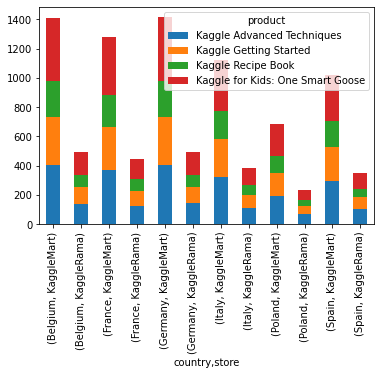

In [6]:
plt.figure(figsize=(15,5))
train_df.groupby(['country','store','product'])['num_sold'].mean().unstack().plot(kind='bar',stacked=True)
plt.show()


```
.unstack()
Pivot a level of the (necessarily hierarchical) index labels.

```

### Adding more Visualization

In [12]:
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Colors
color_pal = sns.color_palette()

plt.style.use('fivethirtyeight')

ModuleNotFoundError: No module named 'xgboost'

In [9]:
print(train_df.index.min())
print(train_df.index.max())

2017-01-01 00:00:00
2020-12-31 00:00:00


/home/aiokleo/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:48: UserWarning: Parsing '31-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)
/home/aiokleo/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:60: UserWarning: Parsing '31-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.ge)
/home/aiokleo/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/converter.py:289: UserWarning: Parsing '31-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return dates.date2num(tools.to_datetime(values))
/home/aiokleo/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/converter.py:313: UserWarning: Parsing '31-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True

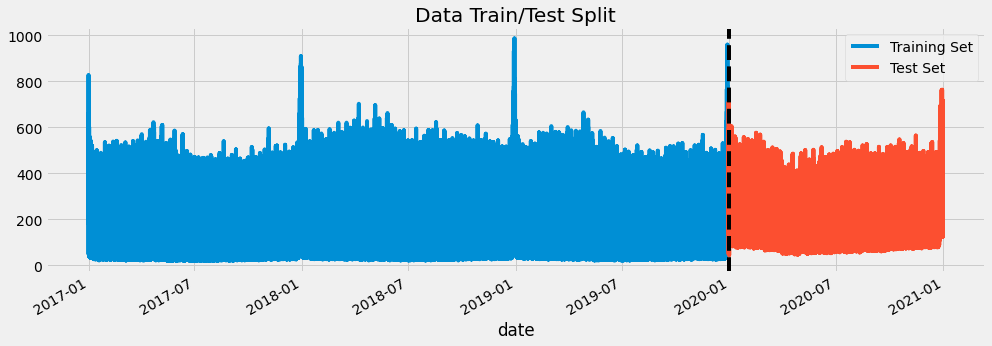

In [10]:

train = train_df.loc[train_df.index < '31-12-2019']
test = train_df.loc[train_df.index >= '31-12-2019']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('31-12-2019', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

## Adding more Features

In [11]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    train_df = df.copy()
#     train_df['hour'] = train_df.index.hour
    train_df['dayofweek'] = train_df.index.dayofweek
    train_df['quarter'] = train_df.index.quarter
    train_df['month'] = train_df.index.month
    train_df['year'] = train_df.index.year
    train_df['dayofyear'] = train_df.index.dayofyear
    train_df['dayofmonth'] = train_df.index.day
    train_df['weekofyear'] = train_df.index.isocalendar().week
    return train_df

train_df = create_features(train_df)
train_df.head()

,country,store,product,num_sold,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,,
2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,6,1,1,2017,1,1,52
2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,6,1,1,2017,1,1,52
2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,6,1,1,2017,1,1,52
2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,6,1,1,2017,1,1,52
2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,6,1,1,2017,1,1,52


## More EDA's

### Monthly Inspect

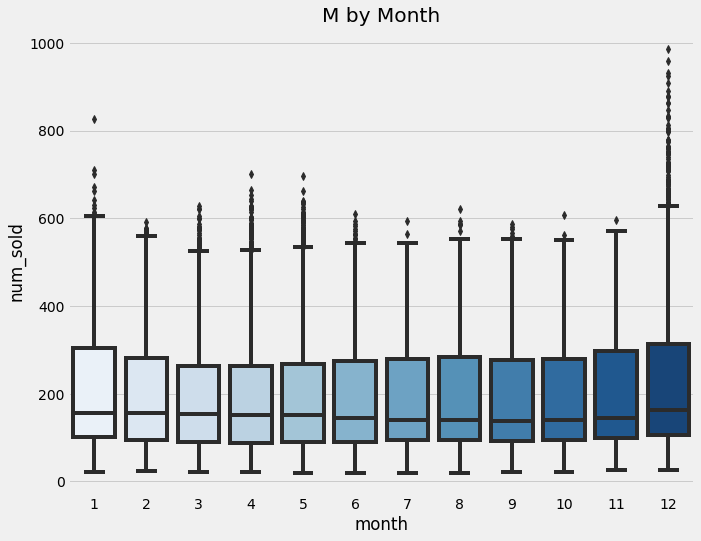

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=train_df, x='month', y='num_sold', palette='Blues')
ax.set_title('M by Month')
plt.show()

### Yearly

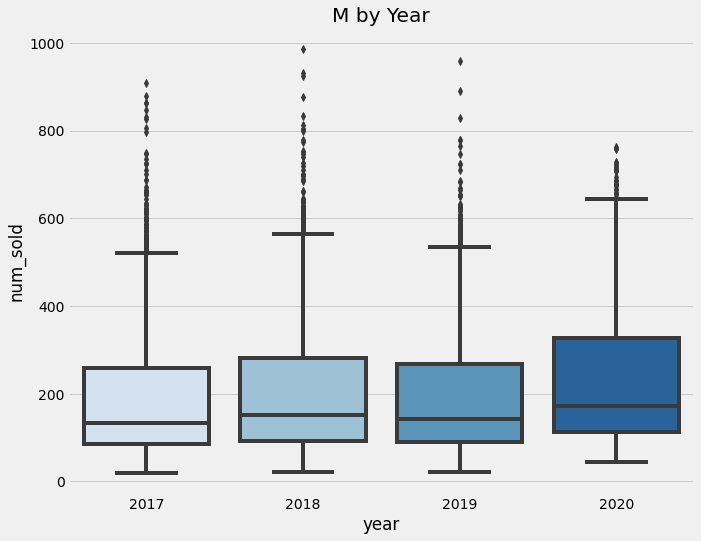

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=train_df, x='year', y='num_sold', palette='Blues')
ax.set_title('M by Year')
plt.show()

# +

## Spliting Data

In [14]:
X = train_df.drop('num_sold', axis=1)
y = train_df[['num_sold']]


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,country,store,product,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,
2019-03-19,France,KaggleMart,Kaggle for Kids: One Smart Goose,1,1,3,2019,78,19,12
2020-10-13,Poland,KaggleMart,Kaggle for Kids: One Smart Goose,1,4,10,2020,287,13,42
2020-07-04,Germany,KaggleMart,Kaggle for Kids: One Smart Goose,5,3,7,2020,186,4,27
2019-11-24,Spain,KaggleMart,Kaggle Getting Started,6,4,11,2019,328,24,47
2020-01-08,Poland,KaggleMart,Kaggle Advanced Techniques,2,1,1,2020,8,8,2


In [483]:
# # train_df.head()
# datetime = pd.to_datetime(train_df['date'])
# print('Value Counts: ',datetime.value_counts().head())

# start = datetime.min()
# end = datetime.max()

# # Time Delta
# duration = end - start
# print('\n Total Sale Duration: ', duration)

### Preprocessing

In [16]:
train_df.head()
country = train_df['country'].unique()
country = list(country)

store = train_df['store'].unique()
store = list(store)

product = train_df['product'].unique()
product = list(product)


### Pipeline

In [17]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# Encoding
pipeline = ColumnTransformer(transformers=[
    ('cat', OrdinalEncoder(categories=[country, store, product]), ['country', 'store', 'product']),
    ('std_scaler', StandardScaler() , ['dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'])
], remainder='passthrough')


X_train = pipeline.fit_transform(X_train)
X_train

array([[ 1.        ,  0.        ,  3.        , ..., -0.99386992,
         0.36982023, -0.96607888],
       [ 4.        ,  0.        ,  3.        , ...,  0.98620181,
        -0.31225332,  1.02373532],
       [ 2.        ,  0.        ,  3.        , ...,  0.02932504,
        -1.33536365,  0.02882822],
       ...,
       [ 2.        ,  1.        ,  2.        , ..., -1.26861672,
         0.2561413 , -1.23138744],
       [ 5.        ,  1.        ,  0.        , ..., -1.56231157,
         0.2561413 , -1.56302313],
       [ 0.        ,  0.        ,  3.        , ...,  1.39358499,
         1.1655727 ,  1.35537102]])

In [18]:
X_test = pipeline.transform(X_test)
X_test.shape

(14026, 10)

## Creating Model

In [34]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1500,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=18,
                       learning_rate=0.15,
                       random_state=42
                      )
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(n_estimators=1000, max_depth=9, random_state=42)


[02:44:29] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:197.73561	validation_1-rmse:196.50575
[94]	validation_0-rmse:1.28658	validation_1-rmse:14.50001


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=18, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1500,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=42, reg_alpha=0, ...)

## Grid

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# grid search
model = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1500,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=18,
                       random_state=42
                      )

learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]

param_grid = dict(learning_rate=learning_rate)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)

grid_result = grid_search.fit(X_train, y_train, eval_set=[(X_train_f, y_train_f)], verbose=100)

/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


[02:49:33] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:34] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:34] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:34] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:34] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:34] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:34] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:34] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:34] WARNING: ../src/objective/regression_

/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 298, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBRegressor' object has no attribute 'predict_proba'

  warnings.warn(


[02:53:43] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:231.62154
[1499]	validation_0-rmse:199.92371


/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 298, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBRegressor' object has no attribute 'predict_proba'

  warnings.warn(


[02:53:45] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:231.62155
[1499]	validation_0-rmse:199.90977


/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 298, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBRegressor' object has no attribute 'predict_proba'

  warnings.warn(


[02:53:48] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:231.62155
[1499]	validation_0-rmse:199.90991


/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 298, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBRegressor' object has no attribute 'predict_proba'

  warnings.warn(


[02:53:49] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:231.62156
[100]	validation_0-rmse:229.35399
[100]	validation_0-rmse:229.35479
[100]	validation_0-rmse:229.35491
[100]	validation_0-rmse:229.35556
[200]	validation_0-rmse:227.10927
[200]	validation_0-rmse:227.11072
[200]	validation_0-rmse:227.11101
[200]	validation_0-rmse:227.11215
[300]	validation_0-rmse:224.88694
[300]	validation_0-rmse:224.88906
[300]	validation_0-rmse:224.88956
[300]	validation_0-rmse:224.89116
[400]	validation_0-rmse:222.68684
[400]	validation_0-rmse:222.68960
[400]	validation_0-rmse:222.69235
[400]	validation_0-rmse:222.69033
[500]	validation_0-rmse:220.50886
[500]	validation_0-rmse:220.51209
[500]	validation_0-rmse:220.51557
[500]	validation_0-rmse:220.51307
[600]	validation_0-rmse:218.35260
[600]	validation_0-rmse:218.35633
[600]	validation_0-rmse:218.36055
[600]	validation_0-rmse:218.35766
[700]	validation_0-rmse:216.21790

/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 298, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBRegressor' object has no attribute 'predict_proba'

  warnings.warn(


[02:55:56] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:231.62154
[1499]	validation_0-rmse:199.92233


/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 298, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBRegressor' object has no attribute 'predict_proba'

  warnings.warn(


[02:55:58] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:231.62156
[1499]	validation_0-rmse:199.91237
[1499]	validation_0-rmse:199.93001


/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 298, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBRegressor' object has no attribute 'predict_proba'

  warnings.warn(
/home/aiokleo/.local/lib/python3.10/si

[02:55:59] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:231.41647
[02:55:59] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:231.41656
[100]	validation_0-rmse:229.35423
[100]	validation_0-rmse:229.35583
[100]	validation_0-rmse:209.74673
[100]	validation_0-rmse:209.75654
[200]	validation_0-rmse:227.10965
[200]	validation_0-rmse:227.11272
[200]	validation_0-rmse:190.14680
[200]	validation_0-rmse:190.16442
[300]	validation_0-rmse:224.88758
[300]	validation_0-rmse:224.89201
[300]	validation_0-rmse:172.44174
[300]	validation_0-rmse:172.41818
[400]	validation_0-rmse:222.68791
[400]	validation_0-rmse:222.69347
[400]	validation_0-rmse:156.41586
[400]	validation_0-rmse:156.38567
[500]	validation_0-rmse:220.51026
[500]	validation_0-rmse:220.51694
[500]	validation_0-rmse:141.92753
[500]	validation_0-rmse:141.89105
[600]	validation_0

/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 298, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBRegressor' object has no attribute 'predict_proba'

  warnings.warn(


[02:58:22] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:231.41651
[1499]	validation_0-rmse:199.91554


/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 298, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBRegressor' object has no attribute 'predict_proba'

  warnings.warn(


[02:58:23] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:231.41644
[1300]	validation_0-rmse:66.30650
[1300]	validation_0-rmse:66.28440
[100]	validation_0-rmse:209.75367
[100]	validation_0-rmse:209.74650
[200]	validation_0-rmse:190.16071
[200]	validation_0-rmse:190.14829
[1400]	validation_0-rmse:60.48362
[1400]	validation_0-rmse:60.46282
[300]	validation_0-rmse:172.44013
[300]	validation_0-rmse:172.42463
[1499]	validation_0-rmse:55.27947


/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 298, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBRegressor' object has no attribute 'predict_proba'

  warnings.warn(


[02:58:56] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:231.41643
[1499]	validation_0-rmse:55.25898


/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 298, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "/home/aiokleo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBRegressor' object has no attribute 'predict_proba'

  warnings.warn(
/home/aiokleo/.local/lib/python3.10/si

[02:58:59] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:231.41650
[400]	validation_0-rmse:156.41511
[400]	validation_0-rmse:156.39176
[100]	validation_0-rmse:209.74670
[100]	validation_0-rmse:209.75295
[500]	validation_0-rmse:141.92261
[500]	validation_0-rmse:141.89420
[200]	validation_0-rmse:190.15166
[200]	validation_0-rmse:190.16295
[600]	validation_0-rmse:128.81391
[600]	validation_0-rmse:128.78852


KeyboardInterrupt: 

In [ ]:
# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('learning_rate.png')

## Important Features

In [494]:

# im_f = pd.DataFrame(data=reg.feature_importances_,
#                     index=reg.feature_names_in_,
#                     columns=['importance'])

# im_f.sort_values('importance').plot(kind='barh', title='Feature Importance')
# # plt.show()

# Then the Test

In [22]:
X_train_f = pipeline.transform(train_df)
y_train_f = train_df[['num_sold']].values

reg.fit(X_train_f, y_train_f,
        eval_set=[(X_train_f, y_train_f)],
        verbose=100)
# model.fit(X_train_f, y_train_f)


[02:41:45] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:163.91298
[100]	validation_0-rmse:11.27137
[200]	validation_0-rmse:10.32554
[300]	validation_0-rmse:9.73810
[400]	validation_0-rmse:9.26461
[500]	validation_0-rmse:8.87533
[600]	validation_0-rmse:8.54543
[700]	validation_0-rmse:8.26722
[800]	validation_0-rmse:8.01983
[900]	validation_0-rmse:7.79903
[1000]	validation_0-rmse:7.58653
[1100]	validation_0-rmse:7.42271
[1200]	validation_0-rmse:7.23733
[1300]	validation_0-rmse:7.07592
[1400]	validation_0-rmse:6.93477
[1499]	validation_0-rmse:6.80513


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1500,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=42, reg_alpha=0, ...)

In [25]:
test_df_f = test_df.set_index('date').drop('row_id', axis=1)
test_df_f = create_features(test_df_f)
X_test_f = pipeline.transform(test_df_f)

In [26]:
prediction = reg.predict(X_test_f)

In [27]:
output = pd.DataFrame({'row_id': test_df.row_id, 'num_sold': prediction})
output.to_csv('submint1112.csv', index=False)
print("Successfull!")

Successfull!
